In [80]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [81]:
files=[file for file in os.listdir(r'C:\Users\brahim\Desktop\Sales_Data')]
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [82]:
 path=r'C:\Users\brahim\Desktop\Sales_Data'
 
 #créer une base de données vide
 all_data=pd.DataFrame()
 
 for file in files:
     current_data=pd.read_csv(path+'/'+file)
     all_data=pd.concat([all_data, current_data])
     print(all_data)

     

        Order ID                     Product Quantity Ordered Price Each  \
0         176558        USB-C Charging Cable                2      11.95   
1            NaN                         NaN              NaN        NaN   
2         176559  Bose SoundSport Headphones                1      99.99   
3         176560                Google Phone                1        600   
4         176560            Wired Headphones                1      11.99   
...          ...                         ...              ...        ...   
1121095   259353      AAA Batteries (4-pack)                3       2.99   
1121096   259354                      iPhone                1        700   
1121097   259355                      iPhone                1        700   
1121098   259356      34in Ultrawide Monitor                1     379.99   
1121099   259357        USB-C Charging Cable                1      11.95   

             Order Date                         Purchase Address  
0        04/19/19 08

In [83]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [84]:
all_data.to_csv(path+'/all_data.csv', index=False)

In [85]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [86]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [87]:
all_data.isnull().sum()

Order ID            3815
Product             3815
Quantity Ordered    3815
Price Each          3815
Order Date          3815
Purchase Address    3815
dtype: int64

In [88]:
# Supprimer les NaN
all_data=all_data.dropna(how='all')
all_data.shape

(1304135, 6)

## Le mois avec le meilleur chiffre d'affaire

In [89]:
def month(x):
    return x.split('/')[0]

In [90]:
all_data['Month']=all_data['Order Date'].apply(month)
all_data

<ipython-input-90-095bc15fba63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Order Date'].apply(month)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [91]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [92]:
all_data=all_data[all_data['Month']!='Order Date']
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [93]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [94]:
# Feature type
all_data['Month']=all_data['Month'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data.dtypes

<ipython-input-94-f6a4ff3cb001>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Month'].astype(int)
<ipython-input-94-f6a4ff3cb001>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=all_data['Price Each'].astype(float)
<ipython-input-94-f6a4ff3cb001>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [95]:
# New feature 'Sales'
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

<ipython-input-95-b20dae190f4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']


In [96]:
all_data.groupby('Month')['Sales'].sum()

Month
1     1.275580e+07
2     1.541416e+07
3     1.964970e+07
4     2.373469e+07
5     2.206825e+07
6     1.804462e+07
7     1.853443e+07
8     1.571128e+07
9     1.468292e+07
10    2.615709e+07
11    2.239722e+07
12    3.229410e+07
Name: Sales, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

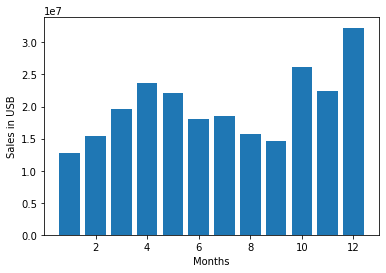

In [97]:
# Visualisation
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['Sales'].sum())
plt.xticks=months
plt.xlabel('Months')
plt.ylabel('Sales in USB')
plt.show

## Dans quelle ville est enregistré un maximum de ventes ?

In [98]:
def city(x):
    return x.split(',')[1]

In [99]:
all_data['city']=all_data['Purchase Address'].apply(city)
all_data

<ipython-input-99-41697e8f0e00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['city']=all_data['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [100]:
all_data.groupby('city')['city'].count()

city
 Atlanta          104167
 Austin            69335
 Boston           139538
 Dallas           103740
 Los Angeles      207235
 New York City    174132
 Portland          87255
 San Francisco    313124
 Seattle          103124
Name: city, dtype: int64

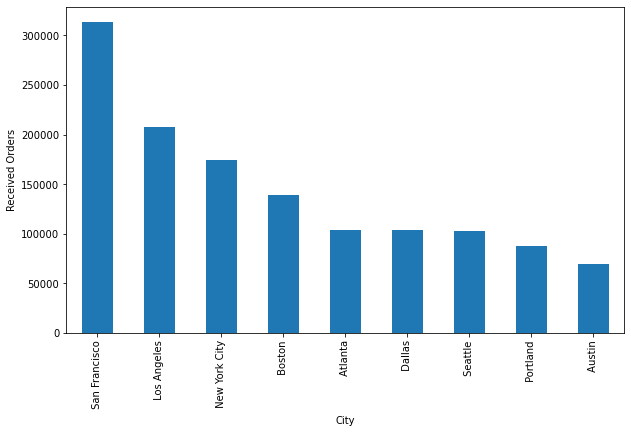

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = city_counts.plot(kind='bar')  
ax.set_xticklabels(city_counts.index, rotation='vertical')  
plt.xlabel('City')
plt.ylabel('Received Orders')
plt.show()

## En quel moment doit on faire une compagne publicitaire pour avoir plus de ventes ?

In [ ]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour 

<ipython-input-51-fcc24c4f20e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour


In [ ]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [ ]:
keys=[]
hours=[]
for key,hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))
hours    

[23460,
 14100,
 7458,
 4986,
 5124,
 7926,
 14892,
 24066,
 37536,
 52488,
 65664,
 74466,
 75522,
 72774,
 65904,
 61050,
 62304,
 65394,
 73680,
 77430,
 73368,
 65526,
 52932,
 37650]

Text(0, 0.5, 'nbr des commandes')

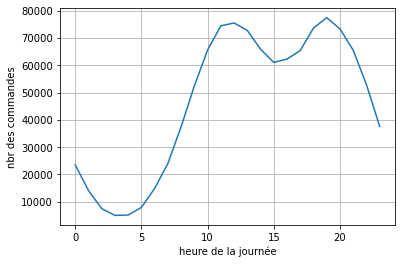

In [ ]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('heure de la journée')
plt.ylabel('nbr des commandes')


## Quel produit se vend le plus

<AxesSubplot:xlabel='Product'>

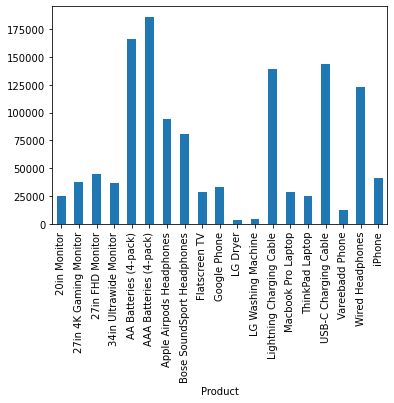

In [ ]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [ ]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [ ]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

<ipython-input-69-18d8393f2818>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


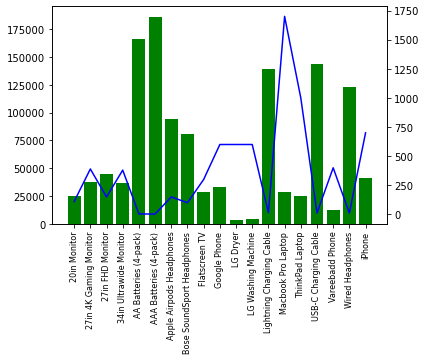

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  

ax1.bar(products, quantity, color='g')  
ax2.plot(products, prices, 'b-') 

ax1.set_xticklabels(products, rotation='vertical', size=8) 

plt.show() 

## Quelles solt les combinaisons de produits qui se vendent le plus?

In [ ]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [ ]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,"Wired Headphones,Wired Headphones,Wired Headph..."
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,"iPhone,iPhone,iPhone,iPhone,iPhone,iPhone"
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,"iPhone,iPhone,iPhone,iPhone,iPhone,iPhone"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."


In [ ]:
df2=df.drop_duplicates(subset=['Order ID'])
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,"Wired Headphones,Wired Headphones,Wired Headph..."
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,"iPhone,iPhone,iPhone,iPhone,iPhone,iPhone"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,"iPhone,iPhone,iPhone,iPhone,iPhone,iPhone"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."


<AxesSubplot:ylabel='Grouped'>

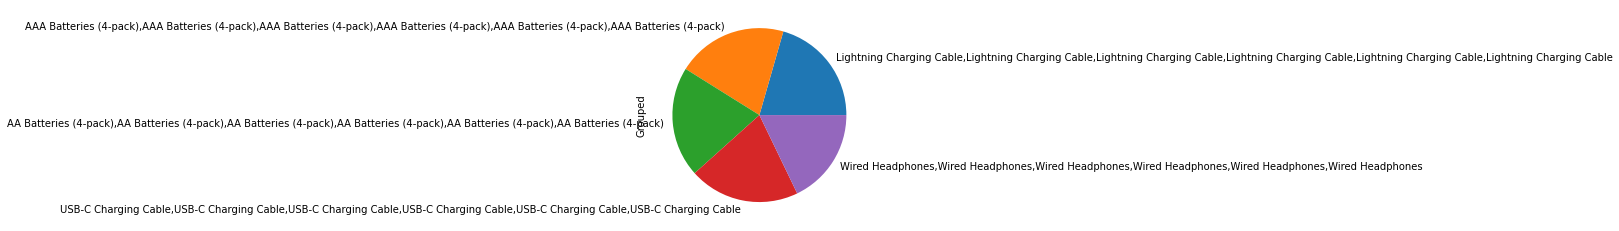

In [ ]:
df2['Grouped'].value_counts()[0:5].plot.pie()